# Predicting house prices using Linear Regression

In this module, you will assume the role of a data acientist at AnyData company. You have been tasked with performing some exploratory data analysis and creating a model that can predict house prices based on one or more features. You will need to download the dataset, perform analysis, and then copy the results back to a private Amazon S3 bucket. You will use Python Jupyter notebooks and common Python libraries such as pandas, Matplotlib and Sklearn.

This notebook has empty code-cells with comments where you will be making use of Amazon CodeWhisperer to generate recommendations to import, explore, transform your data-set and finally train a model and generate inferences.

## Data Import and Exploration

The housing data has been provided as a .csv file which describes house prices sold in the United States based on features such as number of bedrooms, bathrooms, sq. ft. etc. A version of this dataset is from this ML repository under the MIT license data-science.

To get started, we will import the Sagemaker library and define some global variables that will be used later in the notebook to save inference results

In [ ]:
# Defining global variables BUCKET and ROLE that point to the bucket assocaited with the Domain and it's execution role
# Fetch this data by importing the Sagemaker library
import sagemaker
# Define the bucket associated with the Domain
BUCKET = sagemaker.Session().default_bucket()
# Define the IAM role associated with the Domain
ROLE = sagemaker.get_execution_role()


Next, let's import a few additional libraries that you will require during the analysis

In [3]:
import pandas as pd                               # For working with tabular data
import matplotlib.pyplot as plt                   # For charts and visualizations
import os                                         # For manipulating filepath names


Download the public data-set using the Python requests library

In [4]:
# Print Pandas version
print(pd.__version__)

2.0.2


Load the data-set into a pandas data-frame and print it.

In [5]:
'''Using the requests library download the CSV file from 
the url "https://raw.githubusercontent.com/kawsark/data-science/main/housing-linear/housing-data.csv" 
and save it to current directory
'''
import requests
url = "https://raw.githubusercontent.com/kawsark/data-science/main/housing-linear/housing-data.csv"
r = requests.get(url)
with open('housing-data.csv', 'wb') as f:
    f.write(r.content)
    

## Data Transformation and Visualization

Cleaning up data is part of nearly every machine learning project. In this module we will use Amazon CodeWhisperer to help us clean up data and visualize it.

Drop rows that contain any null values from the existing data frame. We will use price as our dependent variable and sq. ft. for independent variable. Lets visualize the relationship between these features in the training data using a scatter plot.

In [11]:
# Load the Melbourne_housing_FULL.csv to a pandas dataframe 
housing_df = pd.read_csv('Housing.csv')

# print the dataframe
print(housing_df)

# get information about the dataframe
print(housing_df.info())


        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

Lets use one hot encoding to convert the `Type` column from categorical to numerical data

In [12]:
#Use one hot encoding to convert furnishingstatus column and show the new dataframe
housing_df = pd.get_dummies(housing_df, columns=['furnishingstatus'])
print(housing_df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

Next using CodeWhisperer, we will drop the `lot_size` column. While this feature may influence house prices, we will exclude it from our analysis for now.

In [13]:
# Drop the `Address` column
housing_df = housing_df.drop(columns=['prefarea'])
#get information about the dataframe
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   price                            545 non-null    int64 
 1   area                             545 non-null    int64 
 2   bedrooms                         545 non-null    int64 
 3   bathrooms                        545 non-null    int64 
 4   stories                          545 non-null    int64 
 5   mainroad                         545 non-null    object
 6   guestroom                        545 non-null    object
 7   basement                         545 non-null    object
 8   hotwaterheating                  545 non-null    object
 9   airconditioning                  545 non-null    object
 10  parking                          545 non-null    int64 
 11  furnishingstatus_furnished       545 non-null    bool  
 12  furnishingstatus_semi-furnished  545

## Model Inference

We will use Amazon CodeWhisperer to create a linear regression model that can predict house prices based on the sq. ft. You can extend this example to multi-variable linear regression and incorporate other features such as Bed, Bath, Lot Size, or the style feature wherer we performed 1-hot encoding in the previous step.

### Create model and fit to data
We will use the Python sklearn library to create the model and indicate that in a comment to provide context for CodeWhisperer. There are two additional steps for fitting the model to our housing data and CodeWhisperer can help us with both of these steps.


Text(0, 0.5, 'price')

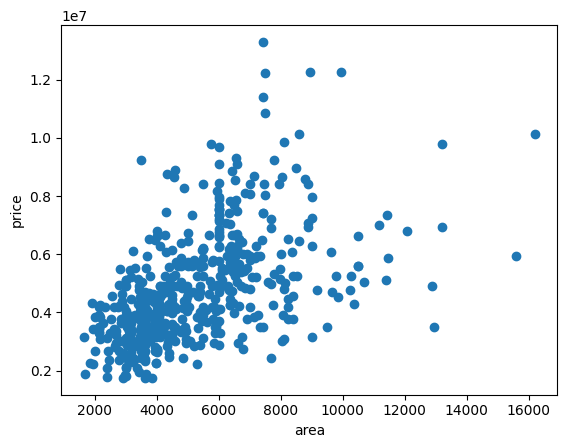

In [14]:
# Drop the rows with null values
data = housing_df.dropna()

# Get x values from the Rooms column
x = data["area"]

# Get y values from the Price column
y = data["price"]

# plot the x and y values
plt.plot(x, y, "o")

# Label the x and y axes
plt.xlabel("area")

plt.ylabel("price")

In [15]:
# Create a liner regression model using the sklearn library
from sklearn.linear_model import LinearRegression

# Define a function to fit the linear regression model
def fit_linear_regression(x, y):
    model = LinearRegression()
    # Fit the linear regression model
    model.fit(x.values.reshape(-1, 1), y)
    # Return the model
    return model

# call the fit_linear_regression function and pass x and y as arguments
model = fit_linear_regression(x, y)

### Visualizing the regression line

In the next code block, we will scatter plot the original values for x and y along with the regression line

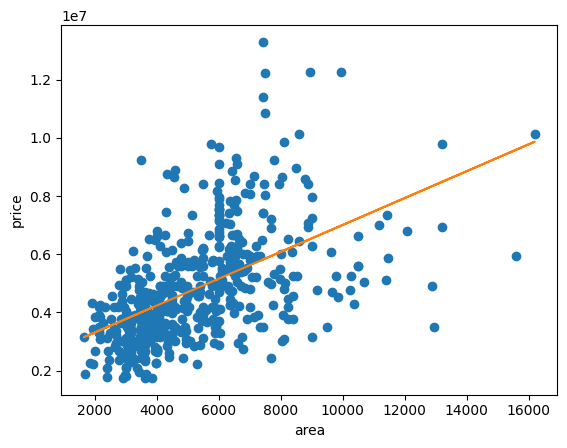

In [16]:
# Plot the original x and y values 
plt.plot(x, y, "o")

# Plot the regression line
plt.plot(x, model.predict(x.values.reshape(-1, 1)))

# Label the axes
plt.xlabel("area")
plt.ylabel("price")
plt.show()

### Predicting house price

We can predict the price of a house based on the sq. ft. using the regression line. For example, lets predict the price of a house of 5000 sq. ft.

### Save results to S3 bucket

Write the results to a csv file and upload this file to an S3 bucket using the Python Boto3 SDK. Use CodeWhisperer suggestions to complete this task easily.